In [ ]:
"""
Kelompok 10
Muhammad Hermawan Alghozy (1301213473)
Dito Rifadli Febrian      (1301213518)
Raditha Ariyani           (1301213527)
"""

'\nKelompok AI\nMuhammad Hermawan Alghozy (1301213473)\nDito Rifadli Febrian            (1301213518)\nRaditha Ariyani                   (1301213527)\n'

In [48]:
import pandas as pd
import requests
import numpy as np
import math
import matplotlib.pyplot as plt

In [49]:
#membaca dataset dari URL ke dalam DataFrame
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'
df = pd.read_csv(url, header=None)

In [50]:
df.head()  # Menampilkan beberapa baris pertama dari DataFrame

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [51]:
# Mengganti beberapa nama kolom dalam DataFrame dengan menggunakan dictionary
df = df.rename(columns={0: 'Age',1: 'Gender',2: 'Height',3: 'Weight',4: 'QRS_duration',5: 'P-R_interval',6: 'Q-T_interval', 7: 'T_interval', 8: 'P_interval', 
                        9: 'QRS', 10: 'T', 11:'P', 12: 'QRST', 13: 'J', 14: 'Heart rate'})

In [52]:
df.head()

,Age,Gender,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [53]:
df.QRS_duration.unique() # Menampilkan nilai unik dari kolom 'QRS_duration'

array([ 91,  81, 138, 100,  88,  77,  78,  84,  89, 102,  75,  82,  70,
        83,  90,  71, 109,  94,  95,  96,  85,  69, 103,  80,  79,  92,
        86,  73,  76,  87, 101,  93, 163, 114, 170, 137,  72,  97,  98,
       106,  74,  99, 111,  63, 113,  68, 110, 108, 153,  62, 146,  67,
       105,  61, 104, 132, 131, 121, 123, 107, 118, 188, 147, 185, 140,
        55, 133])

In [54]:
df.info() # Menampilkan informasi tentang DataFrame, termasuk jumlah entri dan tipe data kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [55]:
df.describe()  # Menampilkan ringkasan statistik dari DataFrame

,Age,Gender,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [56]:
df.shape # Menampilkan dimensi DataFrame (jumlah baris, jumlah kolom)

(452, 280)

In [57]:
fold1 = (df.iloc[0:50].reset_index(drop=True), df.iloc[50:150].reset_index(drop=True))
fold2 = (df.iloc[50:100].reset_index(drop=True), pd.concat([df.iloc[0:50], df.iloc[100:150]]). reset_index(drop=True))
fold3 = (df.iloc[100:150].reset_index(drop=True), df.iloc[0:100].reset_index(drop=True))

test, train = fold2
print(train) # Menampilkan data latih (train) dari lipatan kedua (fold 2)

    Age  Gender  Height  Weight  QRS_duration  P-R_interval  Q-T_interval  \
0    75       0     190      80            91           193           371   
1    56       1     165      64            81           174           401   
2    54       0     172      95           138           163           386   
3    55       0     175      94           100           202           380   
4    75       0     190      80            88           181           360   
..  ...     ...     ...     ...           ...           ...           ...   
95   36       0     168      75            92           194           387   
96   18       0     175      60           102           135           379   
97   34       1     155      54            86           127           369   
98   39       1     160      62            80           123           375   
99   17       1     160      54            85           137           323   

    T_interval  P_interval  QRS  ...  270   271  272  273  274  275  276  \

In [58]:
# Fungsi untuk melakukan normalisasi pada DataFrame
def norm(df):
  df = df.replace('?', int(0)) 
  df = df.astype(int)
  df = (df - df.min()) / (df.max() - df.min())
  return df

x = df.drop('Height', axis=1)

x = norm(x)
x

,Age,Gender,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,T,...,270,271,272,273,274,275,276,277,278,279
0,0.903614,0.0,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,0.533708,...,1.0,0.391304,1.000000,NaN,NaN,0.0,0.666667,0.507576,0.568627,0.466667
1,0.674699,1.0,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,0.601124,...,1.0,0.347826,1.000000,NaN,NaN,0.0,0.666667,0.484848,0.496732,0.333333
2,0.650602,0.0,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,0.592697,...,1.0,0.391304,0.928571,NaN,NaN,0.0,0.750000,0.424242,0.568627,0.600000
3,0.662651,0.0,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,0.528090,...,1.0,0.521739,0.928571,NaN,NaN,0.0,0.666667,0.590909,0.647059,0.000000
4,0.903614,0.0,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,0.533708,...,1.0,0.565217,0.892857,NaN,NaN,0.0,0.750000,0.522727,0.653595,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,0.395894,0.508427,...,1.0,0.173913,0.821429,NaN,NaN,0.0,0.500000,0.303030,0.248366,0.000000
448,0.445783,0.0,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,0.756598,0.682584,...,1.0,0.652174,0.964286,NaN,NaN,0.0,0.666667,0.621212,0.653595,0.600000
449,0.433735,0.0,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,0.443820,...,1.0,0.695652,0.000000,NaN,NaN,0.5,0.583333,0.000000,0.032680,0.066667
450,0.385542,1.0,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,0.578652,...,1.0,0.521739,1.000000,NaN,NaN,0.0,0.666667,0.522727,0.549020,0.000000


In [59]:
# Fungsi untuk menghitung jarak Euclidean antara dua vektor
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

euclidean(x.iloc[0], x.iloc[1])

2.22263848069211

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [61]:
# Fungsi k-NN untuk melakukan klasifikasi
def knn(x_train, y_train, x_test, k):
  dist = []
  for row in range(x_train.shape[0]):
    dist.append(euclidean(x_train.iloc[row], x_test))

  data = x_train.copy()
  data['Dist'] = dist 
  data['Class'] = y_train 
  data = data.sort_values(by = 'Dist').reset_index(drop=True)

  y_pred = data.iloc[:k].Class.mode() 
  return y_pred[0]

In [62]:
# Fungsi untuk menghitung akurasi prediksi
def acc(y_pred, y_true):
  true = 0
  for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
      true+=1
  return true/len(y_pred)

In [67]:
# Fungsi untuk mengevaluasi performa model menggunakan metode validasi silang
def evaluate(fold, k):
  test, train = fold
  x_train, y_train = train.drop('Height', axis=1), train.Age
  x_test, y_test = test.drop('Height', axis=1), test.Age
  x_train = norm(x_train)
  x_test = norm(x_test)
  y_pred = []
  for row in range(x_test.shape[0]):
    y_pred.append(knn(x_train, y_train, x_test.iloc[row], k))
  
  return(acc(y_pred, y_test))

In [71]:
k = 5
accs = []
folds = [fold1, fold2, fold3]
for i in range(len(folds)):
  accs.append(evaluate(folds[1],k))

print(f'Menggunakan k: {k}, dengan rata-rata akurasi: {sum(accs)/3}')

Menggunakan k: 5, dengan rata-rata akurasi: 0.02


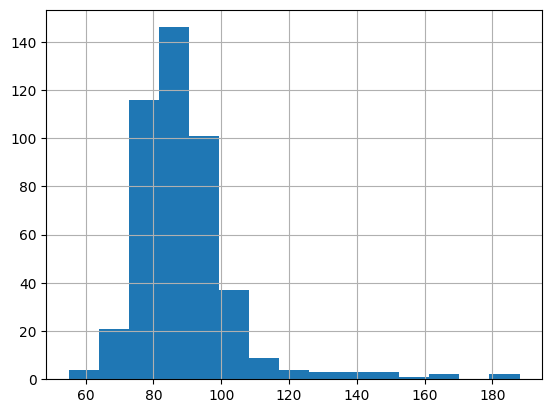

In [ ]:
df["QRS_duration"].hist(bins=15)
plt.show()